<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#👀-Комментарий-ревьюера" data-toc-modified-id="👀-Комментарий-ревьюера-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>👀 Комментарий ревьюера</a></span></li><li><span><a href="#Комментарий-студента" data-toc-modified-id="Комментарий-студента-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Комментарий студента</a></span></li><li><span><a href="#✔-Комментарий-ревьюера-V.2" data-toc-modified-id="✔-Комментарий-ревьюера-V.2-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>✔ Комментарий ревьюера V.2</a></span></li><li><span><a href="#👀-Комментарий-ревьюера" data-toc-modified-id="👀-Комментарий-ревьюера-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>👀 Комментарий ревьюера</a></span></li><li><span><a href="#Комментарий-студента" data-toc-modified-id="Комментарий-студента-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Комментарий студента</a></span></li><li><span><a href="#👀-Комментарий-ревьюера" data-toc-modified-id="👀-Комментарий-ревьюера-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>👀 Комментарий ревьюера</a></span></li><li><span><a href="#Комментарий-студента" data-toc-modified-id="Комментарий-студента-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Комментарий студента</a></span></li><li><span><a href="#✔-Комментарий-ревьюера-V.2" data-toc-modified-id="✔-Комментарий-ревьюера-V.2-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>✔ Комментарий ревьюера V.2</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цели исследования:**

- изучить время продажи квартиры;
- убрать редкие и выбивающиеся значения;
- определить, какие факторы больше всего влияют на стоимость квартиры;
- выделить населённые пункты с самой высокой и низкой стоимостью жилья;
- изучить зависимость цены квартиры от удаленности от центра;
- сравнить квартиры в центре города с остальным сегментом.

## Изучение данных из файла

In [216]:
#сначала импортируем библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [217]:
#откроем таблицу и посмотрим первые десять строк
#далее выведем информацию о ней

data = pd.read_csv('/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
display(data.head(10))
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Согласно описанию к данным:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Вывод

Изучив таблицу, мы видим, что во многих столбцах есть пропущенные значения: ceiling_height, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition.Также необходимо привести названия столбцов к правильному регистру и поменять тип данных в некоторых из них.

## Предобработка данных

**Приведение к представительному формату**

In [218]:
#переименуем неправильные названия столбцов
#и расположим их в более удобном для восприятия формате
data = data[[
    'locality_name',  
    'total_area',
    'living_area',
    'kitchen_area',
    'ceiling_height',
    'rooms',
    'balcony',
    'floor',
    'floors_total',
    'is_apartment',
    'studio',
    'open_plan',  
    'total_images',
    'last_price',
    'first_day_exposition',
    'days_exposition',
    'cityCenters_nearest',
    'airports_nearest',
    'parks_around3000',
    'parks_nearest',
    'ponds_around3000',
    'ponds_nearest'
]]

In [219]:
colum= [
 'locality_name',  
 'total_area',
 'living_area',
 'kitchen_area',
 'ceiling_height',
 'rooms',
 'balcony',
 'floor',
 'floors_total',
 'is_apartment',
 'studio',
 'open_plan',  
 'total_images',
 'last_price',
 'first_day_exposition',
 'days_of_exposition',
 'city_center_m',
 'airports_m',
 'parks_3km',
 'parks_nearest_m',
 'ponds_3km',
 'ponds_nearest_m'
]
data.set_axis(colum, axis='columns', inplace=True)

**Обработка пропусков**

In [220]:
#покажем наглядно количество пропусков в таблице
#в процентах от общего числа
data.isna().mean()*100

locality_name            0.206760
total_area               0.000000
living_area              8.029875
kitchen_area             9.612220
ceiling_height          38.799105
rooms                    0.000000
balcony                 48.605426
floor                    0.000000
floors_total             0.362885
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
total_images             0.000000
last_price               0.000000
first_day_exposition     0.000000
days_of_exposition      13.422507
city_center_m           23.287902
airports_m              23.384953
parks_3km               23.283683
parks_nearest_m         65.909954
ponds_3km               23.283683
ponds_nearest_m         61.559559
dtype: float64

К сожалению, для всех пропущенных значений мы не сможем подобрать логичную замену. Оставим такие случаи без изменений, так как отсутствие значения — тоже важный сигнал, который не нужно прятать.

In [221]:
#скорее всего, если балкона нет, его просто не указывают
#заменим пропущенные значения в этом столбце на 0
data['balcony'] = data['balcony'].fillna(0)

In [222]:
#удалим строки, где не указан населенный пункт
#потому что их процент менее 1 и, не зная
#места, люди обычно квартиры не покупают
data = data.dropna(subset=['locality_name'])

#проверяем корректность работы
data['locality_name'].isnull().sum()

0

In [223]:
#так же поступим с квартирами без указания этажа
data.drop(data[data['floor'] == 0].isnull().index, inplace=True)

#проверяем корректность работы
data['floor'].isnull().sum()

0

In [224]:
#заменим значения Nan в столбце апартаментов на False
#скорее всего люди просто не указывали, что это апартаменты
data['is_apartment'] = data['is_apartment'].fillna(0)

#сразу заменим тип для парвильной работы
data['is_apartment'] = data['is_apartment'].astype(bool)

#проверяем корректность заполнения
data['is_apartment'].value_counts()

False    23600
True        50
Name: is_apartment, dtype: int64

Далее для удобства подсчетов изменим тип данных в столбцах, где это можно сделать, на целочисленный.

In [225]:
data['last_price'] = data['last_price'].astype('int')
data['balcony'] = data['balcony'].astype('int')

In [226]:
#переведем высоту потолков в сантиметры и затем изменим тип на целочисленный
data['ceiling_height'] = data['ceiling_height']*100
#data['ceiling_height'].astype('int')

In [227]:
#переведем столбец first_day_exposition во временной формат и округлим до дня, чтобы упростить рассчеты

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'] = data['first_day_exposition'].dt.round('1D')

In [228]:
#теперь заполним пропуски в столбцах kitchen_area и living_area
#медианными значенями в зависимости от общей площади квартиры
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('total_area')['kitchen_area'].transform('median'))
data['living_area'] = data['living_area'].fillna(data.groupby('total_area')['living_area'].transform('median'))

**Вывод**

Мы заполнили пропуска, где это можно было сделать корректно, изменили тип данных, поменяли названия столбцов и привели таблицу к удодбному для просмотра виду.

## Расчёты и добавление результатов в таблицу

In [229]:
#добавим столбец с рассчетом цены за квадратный метр
data['price_per_metre'] = data['last_price']/data['total_area']
data['price_per_metre'] = data['price_per_metre'].round(2)

#добавим день недели, месяц и год публикации объявления
data['weekday_of_exposition'] = data['first_day_exposition'].dt.weekday
data['month_of_exposition'] = data['first_day_exposition'].dt.month
data['year_of_exposition'] = data['first_day_exposition'].dt.year

#добавим столбец с этажом квартиры
data.loc[data['floor'] == 1, 'floor_optimezed'] = 'первый этаж'
data.loc[data['floor'] == data['floors_total'], 'floor_optimezed'] = 'последний этаж'
data['floor_optimezed'] = data['floor_optimezed'].fillna ('другой этаж')

#добавим столбец с соотношением жилой и общей площади,
#а также отношение площади кухни к общей
data['living_area_ratio'] = data['living_area']/data['total_area']
data['living_area_ratio'] = data['living_area_ratio'].round(2)
data['kitchen_area_ratio'] = data['kitchen_area']/data['total_area']
data['kitchen_area_ratio'] = data['kitchen_area_ratio'].round(2)

In [230]:
#проверим результат

data.head()

,locality_name,total_area,living_area,kitchen_area,ceiling_height,rooms,balcony,floor,floors_total,is_apartment,studio,open_plan,total_images,last_price,first_day_exposition,days_of_exposition,city_center_m,airports_m,parks_3km,parks_nearest_m,ponds_3km,ponds_nearest_m,price_per_metre,weekday_of_exposition,month_of_exposition,year_of_exposition,floor_optimezed,living_area_ratio,kitchen_area_ratio
0,Санкт-Петербург,108.0,51.0,25.0,270.0,3,0,8,16.0,False,False,False,20,13000000,2019-03-07,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0,120370.37,3,3,2019,другой этаж,0.47,0.23
1,посёлок Шушары,40.4,18.6,11.0,NaN,1,2,1,11.0,False,False,False,7,3350000,2018-12-04,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN,82920.79,1,12,2018,первый этаж,0.46,0.27
2,Санкт-Петербург,56.0,34.3,8.3,NaN,2,0,4,5.0,False,False,False,10,5196000,2015-08-20,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0,92785.71,3,8,2015,другой этаж,0.61,0.15
3,Санкт-Петербург,159.0,95.0,15.0,NaN,3,0,9,14.0,False,False,False,0,64900000,2015-07-24,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0,408176.10,4,7,2015,другой этаж,0.60,0.09
4,Санкт-Петербург,100.0,32.0,41.0,303.0,2,0,13,14.0,False,False,False,2,10000000,2018-06-19,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0,100000.00,1,6,2018,другой этаж,0.32,0.41


**Вывод**

Мы добавили необходимые для подсчетов столбцы и теперь готовы приступить к исследовательскому анализу.

## Исследовательский анализ данных

Сначала напишем функцию по определению вбросов с обращением к таблице по методу .describe()

In [231]:
def mustache(column):
    stat = data[column].describe()
    
    # вычислим межквартильный размах
    lQR = stat[6] - stat[4]
    
    # вычислим левый и правый ус    
    left_mustache = round(stat[4] - 1.5 * lQR, 2)
    right_mustache = round(stat[6] + 1.5 * lQR, 2)

    # левый ус не должен быть меньше минимального значения
    if left_mustache < stat[3]: left_mustache = stat[3] 
        
    # правый ус не должен быть больше максимального значения
    if right_mustache > stat[7]: right_mustache = stat[7]
        
    return [left_mustache, right_mustache]

Изучим следующие параметры: площадь, цену, число комнат, высоту потолков. Для этого построим гистаграммы по каждому из них.

In [232]:
#сначала посмотрим на описание данных столбцов
data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23650.000000,2.365000e+04,23650.000000,14490.000000
mean,60.329069,6.541127e+06,2.070106,277.128709
std,35.661808,1.089640e+07,1.078620,126.159329
min,12.000000,1.219000e+04,0.000000,100.000000
25%,40.000000,3.400000e+06,1.000000,252.000000
50%,52.000000,4.650000e+06,2.000000,265.000000
75%,69.700000,6.799000e+06,3.000000,280.000000
max,900.000000,7.630000e+08,19.000000,10000.000000


По данным мы видим, что есть значительные выбросы. Они не позволят нам построить наглядные гистаграммы.
В связи с этим уберем выбросы и построим гистаграммы без них.

In [233]:
#определим усы
mustache('total_area')

[12.0, 114.25]

<AxesSubplot:title={'center':'Гистограмма площади квартир'}, xlabel='Площадь в м2', ylabel='Frequency'>

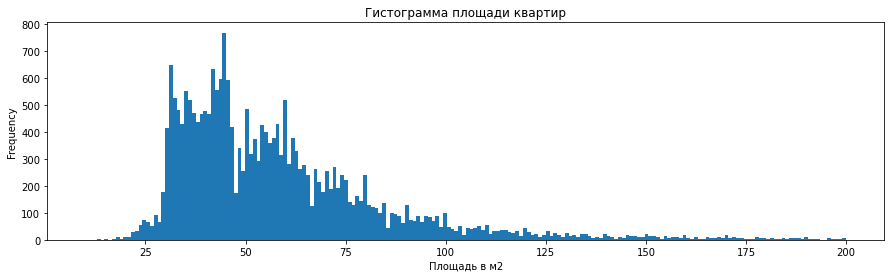

In [234]:
#мы видим минимальную площадь квартиры 12м, это значение правдоподобно
#вряд ли часто можно увидеть квартиры с площадью больше 114м
#поэтому ограничимся такими показателями

plt.title('Гистограмма площади квартир')

plt.xlabel('Площадь в м2')
plt.ylabel('Кол-во квартир')

data['total_area'].plot(kind='hist', figsize=(15,4), bins=200, range=(10, 200))

**Вывод**

Мы видим, что большая часть квартир имеет площадь приблизительно от 29 до 47 метров. Меньше всего продается квартир с площадью до 29 и больше 80 метров.

In [235]:
mustache('last_price')

[12190.0, 11897500.0]

<AxesSubplot:title={'center':'Гистограмма цен за квартиру'}, xlabel='цена', ylabel='Frequency'>

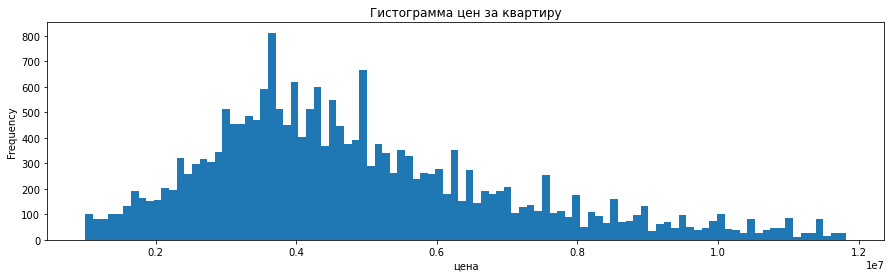

In [236]:
#цена на квартиру может быть любой, однако
#возьмем более менее жизненные показатели

plt.title('Гистограмма цен за квартиру')

plt.xlabel('цена')
plt.ylabel('Кол-во квартир')

data['last_price'].plot(kind='hist', figsize=(15,4), bins=100, range=(1000000, 11825000))

**Вывод**

Больше всего квартир продается в диапазоне от 3 до 5 млн рублей. Далее идет тенденция: чем выше стоимость, тем меньше квартир продается.

In [237]:
mustache('rooms')

[0.0, 6.0]

<AxesSubplot:title={'center':'Кол-во комнат в квартирах'}>

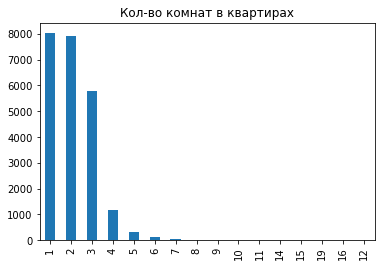

In [238]:
#по таблице видно, что есть квартиры с нулевыми значениями
#таких квартир не бывает, поэтому удалим эти строки
#также ограничим количетво квартир до 6

data.drop(data[data['rooms'] == 0].index, inplace=True)
plt.title('Кол-во комнат в квартирах')
data['rooms'].value_counts().plot.bar()

**Вывод**

Мы видим, что большинство продающихся квартир - это однушки или двушки. Квартир с четырьмя комнатами и больше продается намного меньше.

In [239]:
mustache('ceiling_height')

[207.5, 323.5]

<AxesSubplot:title={'center':'Гистограмма высоты потолков в квартирах'}, xlabel='Высота потолков', ylabel='Frequency'>

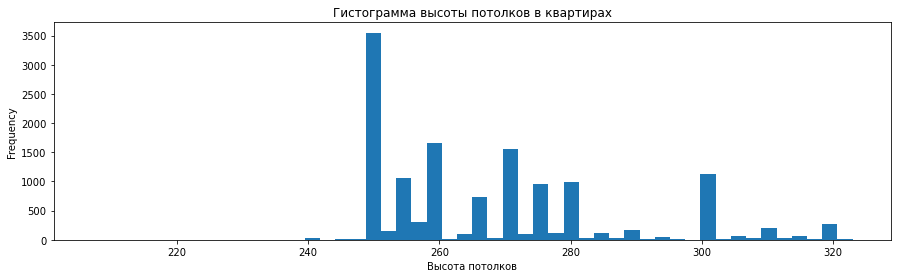

In [240]:
#обычно высота потолков равняется 270-280
#возьмем ограничения с запасом

plt.title('Гистограмма высоты потолков в квартирах')

plt.xlabel('Высота потолков')
plt.ylabel('Кол-во квартир')

data['ceiling_height'].plot(kind='hist', figsize=(15,4), bins=50, range=(207, 323))

**Вывод**

Большинство квартир имеет высоту потолков высотой около 250см. Приблизительно одинаковые значения мы видим на уровнях 260 и 270см, а также 280 и 300см. 

In [241]:
#проведем оценку время продажи квартир
data['days_of_exposition'].describe()

count    20287.000000
mean       181.398827
std        220.147815
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_of_exposition, dtype: float64

In [242]:
mustache('days_of_exposition')

[1.0, 512.5]

<AxesSubplot:title={'center':'Гистограмма "срока жизни" объявлений'}, xlabel='Дни', ylabel='Frequency'>

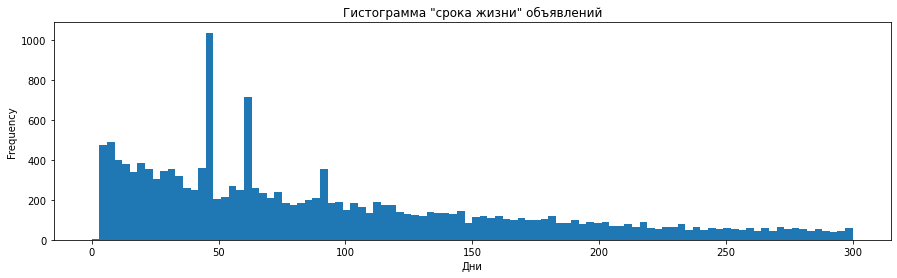

In [243]:
plt.title('Гистограмма "срока жизни" объявлений')

plt.xlabel('Дни')
plt.ylabel('Кол-во квартир')

data['days_of_exposition'].plot(kind='hist', figsize=(15,4), bins=100, range=(0, 300))

Квартиры могут купить как за 1 день, так и продавать очень долго, вплоть до того, что все еще висеть на продаже (возможно, именно поэтому встречаются пропущенные значения).

Среднее арифметическое значение равнятеся 181.4 дням, медиана - 96. В среднем квартиры продаются от 45 до 100 дней. Аномально быстрыми считаются продажи в первые 5 дней, а аномально долгими - после 512.

Также встречаются пики, по данным в Интернете можно узнать, что это даты автоматического снятия объявлений.

In [244]:
# Код ревьюера
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23453 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   locality_name          23453 non-null  object        
 1   total_area             23453 non-null  float64       
 2   living_area            23312 non-null  float64       
 3   kitchen_area           23304 non-null  float64       
 4   ceiling_height         14408 non-null  float64       
 5   rooms                  23453 non-null  int64         
 6   balcony                23453 non-null  int32         
 7   floor                  23453 non-null  int64         
 8   floors_total           23371 non-null  float64       
 9   is_apartment           23453 non-null  bool          
 10  studio                 23453 non-null  bool          
 11  open_plan              23453 non-null  bool          
 12  total_images           23453 non-null  int64         
 13  l

In [245]:
#составим таблицу с хорошими данными на основе написанной функции


data['good_area'] = data['total_area'] < mustache('total_area')[1]
data['good_price'] = data['last_price'] < mustache('last_price')[1]
data['good_rooms'] = data['rooms'] < mustache('rooms')[1]
data['good_ceiling'] = (data['ceiling_height'] < mustache('ceiling_height')[1]) \
                        | data['ceiling_height'].isna()
data['good_days_of_exposition'] = (data['days_of_exposition'] < mustache('days_of_exposition')[1]) \
                        | (data['days_of_exposition'] > mustache('days_of_exposition')[0])
good_data = data[(data['good_area'] == True) & 
     (data['good_price'] == True) &
     (data['good_rooms'] == True) &
     (data['good_ceiling'] == True) &
     (data['good_days_of_exposition'] == True)].reset_index(drop=True)

#проверим таблицу с хорошими данными
good_data.head()

,locality_name,total_area,living_area,kitchen_area,ceiling_height,rooms,balcony,floor,floors_total,is_apartment,studio,open_plan,total_images,last_price,first_day_exposition,days_of_exposition,city_center_m,airports_m,parks_3km,parks_nearest_m,ponds_3km,ponds_nearest_m,price_per_metre,weekday_of_exposition,month_of_exposition,year_of_exposition,floor_optimezed,living_area_ratio,kitchen_area_ratio,good_area,good_price,good_rooms,good_ceiling,good_days_of_exposition
0,посёлок Шушары,40.4,18.6,11.0,NaN,1,2,1,11.0,False,False,False,7,3350000,2018-12-04,81.0,18603.0,12817.0,0.0,NaN,0.0,NaN,82920.79,1,12,2018,первый этаж,0.46,0.27,True,True,True,True,True
1,Санкт-Петербург,56.0,34.3,8.3,NaN,2,0,4,5.0,False,False,False,10,5196000,2015-08-20,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0,92785.71,3,8,2015,другой этаж,0.61,0.15,True,True,True,True,True
2,Санкт-Петербург,100.0,32.0,41.0,303.0,2,0,13,14.0,False,False,False,2,10000000,2018-06-19,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0,100000.00,1,6,2018,другой этаж,0.32,0.41,True,True,True,True,True
3,городской посёлок Янино-1,30.4,14.4,9.1,NaN,1,0,5,12.0,False,False,False,10,2890000,2018-09-10,55.0,NaN,NaN,NaN,NaN,NaN,NaN,95065.79,0,9,2018,другой этаж,0.47,0.30,True,True,True,True,True
4,посёлок Парголово,37.3,10.6,14.4,NaN,1,1,6,26.0,False,False,False,6,3700000,2017-11-02,155.0,19143.0,52996.0,0.0,NaN,0.0,NaN,99195.71,3,11,2017,другой этаж,0.28,0.39,True,True,True,True,True


In [246]:
# Код ревьюера
good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18294 entries, 0 to 18293
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   locality_name            18294 non-null  object        
 1   total_area               18294 non-null  float64       
 2   living_area              18205 non-null  float64       
 3   kitchen_area             18183 non-null  float64       
 4   ceiling_height           10538 non-null  float64       
 5   rooms                    18294 non-null  int64         
 6   balcony                  18294 non-null  int32         
 7   floor                    18294 non-null  int64         
 8   floors_total             18231 non-null  float64       
 9   is_apartment             18294 non-null  bool          
 10  studio                   18294 non-null  bool          
 11  open_plan                18294 non-null  bool          
 12  total_images             18294 n

In [247]:
good_data.describe()

,total_area,living_area,kitchen_area,ceiling_height,rooms,balcony,floor,floors_total,total_images,last_price,days_of_exposition,city_center_m,airports_m,parks_3km,parks_nearest_m,ponds_3km,ponds_nearest_m,price_per_metre,weekday_of_exposition,month_of_exposition,year_of_exposition,living_area_ratio,kitchen_area_ratio
count,18294.000000,18205.000000,18183.000000,10538.000000,18294.000000,18294.000000,18294.000000,18231.000000,18294.000000,1.829400e+04,18294.000000,13776.000000,13764.00000,13776.000000,5586.000000,13776.000000,6526.000000,18294.000000,18294.000000,18294.000000,18294.000000,18205.000000,18183.000000
mean,52.037063,29.659564,9.444208,265.739704,1.891932,0.592763,6.014540,11.005705,9.476823,4.710958e+06,171.791352,15210.670732,29090.93236,0.538690,490.435195,0.689968,534.313515,91320.076549,2.589592,6.573029,2017.242867,0.560770,0.190960
std,17.205536,12.349685,3.559383,17.048332,0.857321,0.932889,4.957437,6.667387,5.524131,2.091778e+06,209.966156,8388.963928,13109.06922,0.752172,333.389644,0.875264,276.149442,28603.525348,1.790795,3.486469,0.951395,0.100619,0.069091
min,12.000000,2.000000,2.000000,100.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.219000e+04,1.000000,329.000000,0.00000,0.000000,1.000000,0.000000,16.000000,111.830000,0.000000,1.000000,2014.000000,0.040000,0.040000
25%,38.762500,18.000000,7.000000,250.000000,1.000000,0.000000,2.000000,5.000000,6.000000,3.300000e+06,44.000000,10890.000000,17942.00000,0.000000,289.000000,0.000000,322.250000,74576.270000,1.000000,3.000000,2017.000000,0.490000,0.140000
50%,48.000000,28.800000,9.000000,260.000000,2.000000,0.000000,4.000000,9.000000,9.000000,4.300000e+06,91.000000,13755.500000,27556.00000,0.000000,456.000000,0.000000,522.000000,91913.325000,3.000000,7.000000,2017.000000,0.570000,0.180000
75%,62.000000,38.000000,11.000000,275.000000,3.000000,1.000000,8.000000,16.000000,13.000000,5.800000e+06,217.000000,16791.500000,38195.00000,1.000000,616.000000,1.000000,741.000000,107719.957500,4.000000,10.000000,2018.000000,0.630000,0.240000
max,114.800000,90.200000,50.000000,323.000000,5.000000,5.000000,33.000000,60.000000,50.000000,1.180967e+07,1580.000000,65968.000000,84869.00000,3.000000,3190.000000,3.000000,1344.000000,312240.000000,6.000000,12.000000,2019.000000,0.980000,0.790000


Удалив лишние значения, мы видим, что таблица приобрела реальный вид и на ее основе мы можем продолжить работать дальше.

In [248]:
#рассчитаем, какие факторы больше всего влияют на стоимость квартиры

display(good_data[['total_area', 'rooms',\
           'floor', 'city_center_m', 'weekday_of_exposition',\
           'month_of_exposition', 'year_of_exposition']].corrwith(good_data['last_price']))

total_area               0.692883
rooms                    0.425897
floor                    0.152398
city_center_m           -0.336300
weekday_of_exposition   -0.007776
month_of_exposition      0.008428
year_of_exposition      -0.020154
dtype: float64

In [249]:
good_data.pivot_table(index=['floor_optimezed'], values='last_price', aggfunc='mean')

,last_price
floor_optimezed,
другой этаж,4.907334e+06
первый этаж,3.970167e+06
последний этаж,4.322271e+06


Построив таблицу зависимости цены квартиры от этажа мы видим, что самые дешевые квартиры расположены на первом этаже. Это не странно, так как согласно статистике, цена на них в среднем на 10% ниже. Не удивительно, что самые дорогие квартиры расположены и не на последнем этаже, так как их цена тоже в среднем ниже.

In [250]:
good_data.pivot_table(index='weekday_of_exposition',
                      values='last_price', aggfunc='mean')

,last_price
weekday_of_exposition,
0,4.700607e+06
1,4.734999e+06
2,4.702262e+06
3,4.757857e+06
4,4.720399e+06
5,4.642678e+06
6,4.632472e+06


In [251]:
good_data.pivot_table(index='month_of_exposition', 
                      values='last_price', aggfunc='mean')

,last_price
month_of_exposition,
1,4.676984e+06
2,4.714934e+06
3,4.637779e+06
4,4.797434e+06
5,4.739486e+06
6,4.577566e+06
7,4.647334e+06
8,4.760288e+06
9,4.822263e+06


In [252]:
good_data.pivot_table(index='year_of_exposition', 
                      values='last_price', aggfunc='mean')

,last_price
year_of_exposition,
2014,5.556114e+06
2015,5.068605e+06
2016,4.680542e+06
2017,4.692708e+06
2018,4.647548e+06
2019,4.955413e+06


Изучив таблицы, мы можем сказать, что зависимости цены от дня недели или месяца не прослеживается. Средняя цена на квартиру упала после 2014 года, что может быть спровоцировано, например, геополитическими факторами и введеним санкций из-за присоединения Крыма, однако затем стоимость находилась примерно на одном и том же уровне. 

**Вывод**

Сильнее всего на цену квартиры влияет общая площадь, далее идет количество комнат (логично, так как они взаимосвязаны). Также прослеживается обратная зависимость цены от расстояния до центра города. Также можно отметить, что самые дешевые квартиры расположены на первом этаже, а самые дорогие - на последнем. Зависимость цены от года не прослеживается, за исключением ее падения после 2014 года.

In [253]:
#выберем 10 населенных пунктов с наибольшим количеством объявлений
#рассчитает в них среднюю цену квадратного метра

locality_price_ratio = good_data.pivot_table(index='locality_name', values='price_per_metre', 
                                             aggfunc=['count', 'median'])
locality_price_ratio.columns = ['count', 'median']
locality_price_ratio.sort_values('count', ascending=False).head(10)

,count,median
locality_name,,
Санкт-Петербург,11669,100900.900
посёлок Мурино,489,84375.000
посёлок Шушары,400,75933.555
Всеволожск,329,65686.270
Колпино,303,73913.040
посёлок Парголово,297,91516.560
деревня Кудрово,282,91618.220
Пушкин,280,97426.935
Гатчина,263,67187.500


**Вывод**

Город с самой большой ценой за квадратный метр является Санкт-Петербург. Самая низкая цена во Всеволожске.

<AxesSubplot:xlabel='city_center_km'>

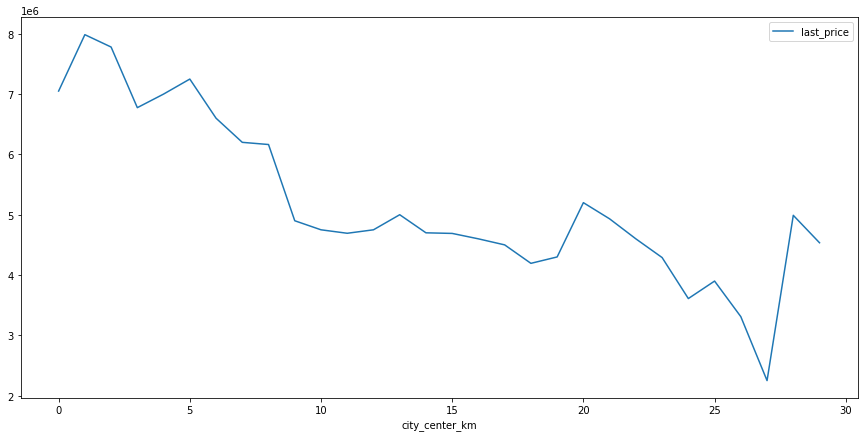

In [254]:
good_data['city_center_km'] = round(good_data['city_center_m'] / 1000, 0)
saint_p = good_data.query('locality_name == "Санкт-Петербург"')
saint_p_center = saint_p.pivot_table(index='city_center_km', values=['last_price'], aggfunc='median')
saint_p_center.head()
plt.figure(figsize=(15, 7))
sns.lineplot(data=saint_p_center)

**Вывод**

На графике прослеживается падение цены, начиная с 5-го км, будем считать эту область за центр города.

In [255]:
#выделим центр города
saint_p_center = good_data[(good_data['city_center_km'] < 5) &
                           (good_data['locality_name'] == 'Санкт-Петербург')]

#проанализируем необходимые столбцы
saint_p_center[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,670.000000,6.700000e+02,670.000000,365.000000
mean,66.470776,7.283444e+06,2.417910,293.449315
std,20.770991,2.042540e+06,0.925462,19.512486
min,12.000000,1.600000e+06,1.000000,240.000000
25%,50.000000,5.700000e+06,2.000000,280.000000
50%,65.000000,7.230000e+06,2.000000,300.000000
75%,81.475000,8.737500e+06,3.000000,310.000000
max,114.800000,1.180000e+07,5.000000,323.000000


In [256]:
#проанализируем зависимость числа комнат, этажа, удалённости от центра и даты размещения
#объявления от цены

#display(saint_p_center[['last_price', 'total_area', 'rooms',\
#           'floor', 'city_center_m', 'weekday_of_exposition',\
#           'month_of_exposition', 'year_of_exposition']].corr())
display(saint_p_center[['total_area', 'rooms',\
           'floor', 'city_center_m', 'weekday_of_exposition',\
           'month_of_exposition', 'year_of_exposition']].corrwith(saint_p_center['last_price']))

total_area               0.673918
rooms                    0.467442
floor                    0.142945
city_center_m           -0.086476
weekday_of_exposition   -0.041127
month_of_exposition     -0.020136
year_of_exposition      -0.030241
dtype: float64

In [257]:
saint_p_center.pivot_table(index='floor_optimezed', values='last_price', aggfunc='mean')

,last_price
floor_optimezed,
другой этаж,7.518140e+06
первый этаж,6.262882e+06
последний этаж,7.463862e+06


Здесь все очевидно: самые дешевые квартиры расположены на первом этаже. Средняя цена кварти на других этажах почти одинаковая. 

In [258]:
saint_p_center['city_center_km'].round()
saint_p_center.pivot_table(index='city_center_km', values='last_price', aggfunc='mean')

,last_price
city_center_km,
0.0,6.650000e+06
1.0,7.817414e+06
2.0,7.682950e+06
3.0,6.891080e+06
4.0,7.209537e+06


Мы видим, что самые дорогие квартиры находятся на расстоянии приблизительно 1-2км от условного цента, а самые дешевые - 3км.

In [259]:
saint_p_center.pivot_table(index='weekday_of_exposition', 
                      values='last_price', aggfunc='mean')

,last_price
weekday_of_exposition,
0,7.562529e+06
1,7.421095e+06
2,7.127638e+06
3,7.092443e+06
4,7.393000e+06
5,6.819008e+06
6,7.583712e+06


In [260]:
saint_p_center.pivot_table(index='month_of_exposition', 
                      values='last_price', aggfunc='mean')

,last_price
month_of_exposition,
1,7.159086e+06
2,7.387594e+06
3,7.297679e+06
4,7.634797e+06
5,7.314215e+06
6,6.990168e+06
7,7.359528e+06
8,6.949333e+06
9,7.554917e+06


In [261]:
saint_p_center.pivot_table(index='year_of_exposition', 
                      values='last_price', aggfunc='mean')

,last_price
year_of_exposition,
2014,8.830000e+06
2015,7.080262e+06
2016,7.665918e+06
2017,7.229997e+06
2018,7.161263e+06
2019,7.575833e+06


**Вывод**

Здесь ситуация следующая: в целом цена продажи не зависит от дня недели, однако в субботу этот показатель самый низкий.  Также можно выделить саную низку цену и по месяцам - это авугст. Годовой показатель аналогичен ситуации на общем рынке, после 2014 года был спад средней стоимости жилья.

Text(0.5, 1.0, 'Распределение стоимости квартир по всему городу')

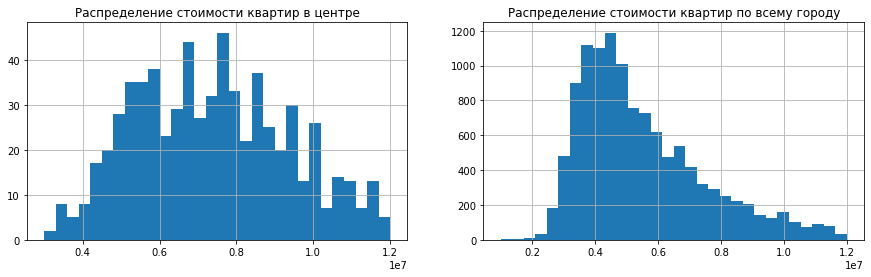

In [262]:
fig, axes = plt.subplots(1,2,figsize=(15,4))

saint_p_center['last_price'].hist(bins=30, ax=axes[0], range=(3000000, 12000000))
good_data[good_data['locality_name'] == 'Санкт-Петербург']['last_price'].hist(bins=30, ax=axes[1], range=(1000000,12000000))

axes[0].set_title('Распределение стоимости квартир в центре')
axes[1].set_title('Распределение стоимости квартир по всему городу')

Мы видим, что пик покупки квартир по городу в целом приходится на 4.5 млн, в то время как большинство квартир в центре продалось от 6 до 9 млн. 

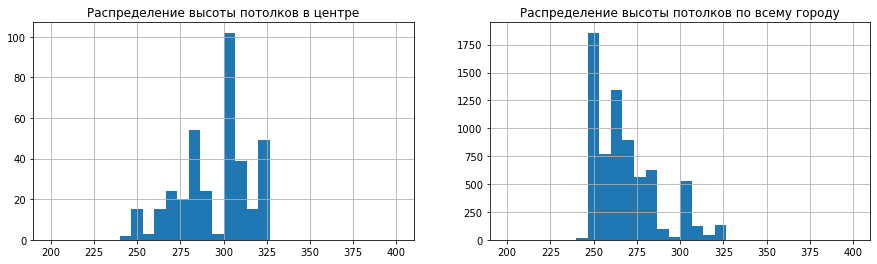

In [263]:
fig, axes = plt.subplots(1,2,figsize=(15,4))

saint_p_center['ceiling_height'].hist(bins=30, ax=axes[0], range=(200, 400))
good_data[good_data['locality_name'] == 'Санкт-Петербург']['ceiling_height'].hist(bins=30, ax=axes[1], range=(200,400))

axes[0].set_title('Распределение высоты потолков в центре')
axes[1].set_title('Распределение высоты потолков по всему городу')

plt.show()

Text(0.5, 1.0, 'Распределение общей площади по всему городу')

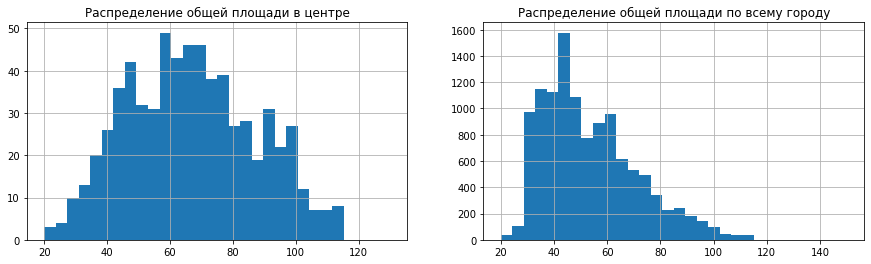

In [264]:
fig, axes = plt.subplots(1,2,figsize=(15,4))

saint_p_center['total_area'].hist(bins=30, ax=axes[0], range=(20, 130))
good_data[good_data['locality_name'] == 'Санкт-Петербург']['total_area'].hist(bins=30, ax=axes[1], range=(20,150))

axes[0].set_title('Распределение общей площади в центре')
axes[1].set_title('Распределение общей площади по всему городу')

Большинство квартир в центре города имеют площадь от 55 до 79 квадратных метров. Площаь большинства квартир по городу равняется 41-44 квадратным метрам.  

Text(0.5, 1.0, 'Распределение количества комнат в центре')

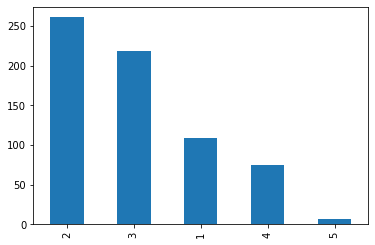

In [265]:
saint_p_center['rooms'].value_counts().plot.bar()

axes[0].set_title('Распределение количества комнат в центре')

Text(0.5, 1.0, 'Распределение количества комнат по всему городу')

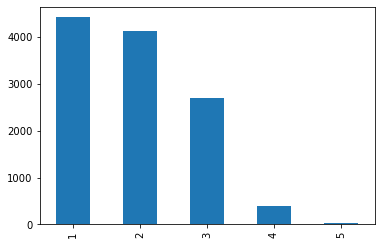

In [266]:
good_data[good_data['locality_name'] == 'Санкт-Петербург']['rooms'].value_counts().plot.bar()

axes[1].set_title('Распределение количества комнат по всему городу')

Большинство комнат в центре имеют 2 или 3 комнаты. Во всем городе большая часть квартир - одно- и двухкомнатные.

**Вывод**

 Мы видим, что в центре города высота потолков, итоговая цена на квартиры, количество комнат и площадь квартир выше, чем пообщим данным в городе, что и следовало ожидать.

## Общий вывод

Мы провели исследование и можем сдеалть следующие выводы по самым ликвидным квартирам:
- количество комнат равняется 1 или 2;
- высота потолков составляет около 2.5м;
- цена варьируется от 2.5 до 4.5 млн;
- площадь равняется от 27 до 49 метров.

Как мы выяснили, в большей степени на цену влияет площадь квартиры и количество комнат. Важным элементом является этаж, квартиры на первом этаже продаются по самой низкой цене. Также, можно отметить, что по общей статистике цена квартиры обратно пропорциональна удаленности от центра.

Квартиры в центре Питера почти на 3млн дороже, чем по городу. Их площадь больше приблизительно на 15 кв.м., высота полотлков - на 50см, а количество комнат - на одну. Зависимость от цены и остальные параметры почти не отличаются от общей статистики по региону. 